In [45]:
#Importa Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [46]:
#Importando o Dataset
df = pd.read_csv("https://raw.githubusercontent.com/AndrelsOliveira/PES_Ciencia_Dados/main/high_diamond_ranked_10min.csv")
df['vencedor'] = list(map(lambda x: 'Azul' if x == 1 else 'Vermelho', df['blueWins']))

#Utilizando apenas os dados do time vermelho (20 colunas)
df_vermelho = df[['vencedor', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']]

df_vermelho.head(10)

,vencedor,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,Vermelho,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,Vermelho,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,Vermelho,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,Vermelho,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,Vermelho,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
5,Azul,36,5,1,3,5,2,0,0,0,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1
6,Azul,57,1,0,6,7,9,0,0,0,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3
7,Vermelho,15,0,1,13,5,11,1,1,0,0,17920,6.6,16938,157,54,2615,800,15.7,1792.0
8,Vermelho,15,2,1,7,7,5,2,1,1,0,18380,7.2,19298,240,53,1979,771,24.0,1838.0
9,Azul,16,2,0,5,4,4,0,0,0,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5


In [47]:
#Dados:
x_df_vermelho = df_vermelho.drop('vencedor', axis=1)
y_df_vermelho = df_vermelho['vencedor']

xtrain, xtest, ytrain, ytest = train_test_split(x_df_vermelho, y_df_vermelho, random_state=1, train_size=0.5)
#verificar o % do Split default

In [48]:
# Etapas:
from sklearn.naive_bayes import GaussianNB # 1. escolha da técnica
model = GaussianNB()                       # 2. instanciação do modelo
model.fit(xtrain, ytrain)                  # 3. criação do modelo

ymodel_predic = model.predict(xtest)             # 4. predição em novos dados


# Calculo da acurácia do modelo:
from sklearn.metrics import  accuracy_score
print("Acurácia dos Dados de Teste:", str(accuracy_score(ytest, ymodel_predic)))

Acurácia dos Dados de Teste: 0.719838056680162


[[1865  625]
 [ 759 1691]]


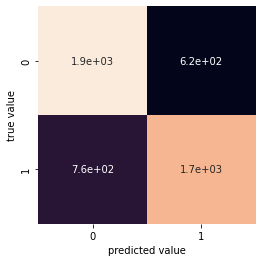

In [49]:
# Matriz Confusão
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ymodel_predic)
sns.heatmap(mat, square=True, annot=True, cbar=False) #DUVIDA - Verificar qual parâmetro muda o escala
plt.xlabel('predicted value')
plt.ylabel('true value')
# 1865 / 625
# 759 / 1691
print(mat)

## Avaliação de Modelos e Hiper-Parâmetros

In [50]:
# POSSO RETIRAR ESSE BLOCO


#Importando o Dataset
df = pd.read_csv("https://raw.githubusercontent.com/AndrelsOliveira/PES_Ciencia_Dados/main/high_diamond_ranked_10min.csv")
df['vencedor'] = list(map(lambda x: 'Azul' if x == 1 else 'Vermelho', df['blueWins']))

#Utilizando apenas os dados do time vermelho (20 colunas)
df_vermelho = df[['vencedor', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']]

df_vermelho.head(10)

,vencedor,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,Vermelho,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,Vermelho,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,Vermelho,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,Vermelho,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,Vermelho,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
5,Azul,36,5,1,3,5,2,0,0,0,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1
6,Azul,57,1,0,6,7,9,0,0,0,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3
7,Vermelho,15,0,1,13,5,11,1,1,0,0,17920,6.6,16938,157,54,2615,800,15.7,1792.0
8,Vermelho,15,2,1,7,7,5,2,1,1,0,18380,7.2,19298,240,53,1979,771,24.0,1838.0
9,Azul,16,2,0,5,4,4,0,0,0,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5


In [51]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

x_df_vermelho = df_vermelho.drop('vencedor', axis=1)
y_df_vermelho = df_vermelho['vencedor']

xtrain, xtest, ytrain, ytest = train_test_split(x_df_vermelho, y_df_vermelho, random_state=1)

In [52]:
#Calculando a acurácia do Modelo de Treinamento e Teste
ytrain_model = model.fit(xtrain, ytrain).predict(xtrain)
ytest_model = model.fit(xtrain, ytrain).predict(xtest)

print("Acurácia dos Dados de Treinamento:", str(accuracy_score(ytrain, ytrain_model)))
print("Acurácia dos Dados de Teste:", str(accuracy_score(ytest, ytest_model)))

Acurácia dos Dados de Treinamento: 1.0
Acurácia dos Dados de Teste: 0.6469635627530365


Cross-Validation


In [31]:
# Utilizando Cross-Validation
from sklearn.model_selection import cross_val_score

# Utilizando laço FOR para determinar qual a melhor quantidade de Folds para o algorítmo KNN:

k_range = range(1, 31)
k_scores = []

max_score = 0
max_score_position = 0

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_df_vermelho, y_df_vermelho, cv=10, scoring='accuracy')

    k_scores.append(scores.mean())
    
    if float(scores.mean()) > max_score:
        max_score = scores.mean()
        max_score_position = k
    
    print('KNN:',k,'Cross-Validation accuracy: ',scores.mean())
print('Melhor valor KNN:', max_score_position, 'Cross-Validation Accuracy: ',max_score)


KNN: 1 Cross-Validation accuracy:  0.6417663430261414
KNN: 2 Cross-Validation accuracy:  0.642577187649976
KNN: 3 Cross-Validation accuracy:  0.6665657597348528
KNN: 4 Cross-Validation accuracy:  0.6730444154576294
KNN: 5 Cross-Validation accuracy:  0.6876197244338342
KNN: 6 Cross-Validation accuracy:  0.6853934139768406
KNN: 7 Cross-Validation accuracy:  0.6962241938725701
KNN: 8 Cross-Validation accuracy:  0.6912635516778854
KNN: 9 Cross-Validation accuracy:  0.7018921075192072
KNN: 10 Cross-Validation accuracy:  0.7014864288380525
KNN: 11 Cross-Validation accuracy:  0.7055362424063432
KNN: 12 Cross-Validation accuracy:  0.7057380562699711
KNN: 13 Cross-Validation accuracy:  0.7073581047545212
KNN: 14 Cross-Validation accuracy:  0.7089778455959866
KNN: 15 Cross-Validation accuracy:  0.7144426122589616
KNN: 16 Cross-Validation accuracy:  0.7132287551940408
KNN: 17 Cross-Validation accuracy:  0.7139375648614171
KNN: 18 Cross-Validation accuracy:  0.7159626767409522
KNN: 19 Cross-Valida

Text(0, 0.5, 'Cross-Validated Accuracy')

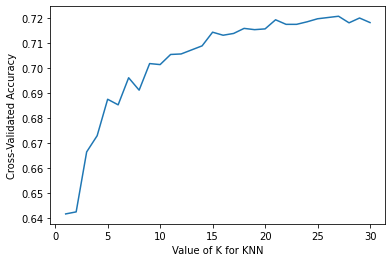

In [32]:
# plotando o valor de K versus a acurácia no cross-validation
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [53]:
# Utilizando a quantidade otimizada de KNN = 27 calculada no item anterior.
model = KNeighborsClassifier(n_neighbors=27)
ytrain_model = model.fit(xtrain, ytrain).predict(xtrain)
ytest_model = model.fit(xtrain, ytrain).predict(xtest)

print("Acurácia do modelo de Treinamento:", accuracy_score(ytrain, ytrain_model))
print("Acurácia do modelo de Teste:", accuracy_score(ytest, ytest_model))
# Houve uma melhoria na acurácio do desempenho do modelo utilizando KNN = 27

Acurácia do modelo de Treinamento: 0.73883115130247
Acurácia do modelo de Teste: 0.719838056680162


#### Feature Engineering: one-hot enconding

In [34]:
#Importando o Dataset
df = pd.read_csv("https://raw.githubusercontent.com/AndrelsOliveira/PES_Ciencia_Dados/main/high_diamond_ranked_10min.csv")
df['vencedor'] = list(map(lambda x: 'Azul' if x == 1 else 'Vermelho', df['blueWins']))

#Utilizando apenas os dados do time vermelho (20 colunas)
df_vermelho = df[['vencedor', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']]
df_vermelho.head()

,vencedor,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,Vermelho,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,Vermelho,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,Vermelho,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,Vermelho,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,Vermelho,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [35]:
df_vermelho['vencedor'] = df_vermelho['vencedor'].astype('category')
df_vermelho['vencedor'] = df_vermelho['vencedor'].cat.codes
df_vermelho.head()

C:\Users\ALDOLIV\AppData\Local\Temp/ipykernel_8876/617787300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vermelho['vencedor'] = df_vermelho['vencedor'].astype('category')
C:\Users\ALDOLIV\AppData\Local\Temp/ipykernel_8876/617787300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vermelho['vencedor'] = df_vermelho['vencedor'].cat.codes


,vencedor,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,1,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,1,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,1,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,1,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,1,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [36]:
#one-hot encoding
dfDummies = pd.get_dummies(df_vermelho['vencedor'], prefix = 'vencedor')
dfDummies.head()

,vencedor_0,vencedor_1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [37]:
df_vermelho = pd.concat([df_vermelho, dfDummies], axis=1)
df_vermelho.head()

,vencedor,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,...,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,vencedor_0,vencedor_1
0,1,15,6,0,6,9,8,0,0,0,...,6.8,17047,197,55,-643,8,19.7,1656.7,0,1
1,1,12,1,1,5,5,2,2,1,1,...,6.8,17438,240,52,2908,1173,24.0,1762.0,0,1
2,1,15,3,1,11,7,14,0,0,0,...,6.8,17254,203,28,1172,1033,20.3,1728.5,0,1
3,1,15,2,1,5,4,10,0,0,0,...,7.0,17961,235,47,1321,7,23.5,1647.8,0,1
4,1,17,2,1,6,6,7,1,1,0,...,7.0,18313,225,67,1004,-230,22.5,1740.4,0,1


#### Randon Forest

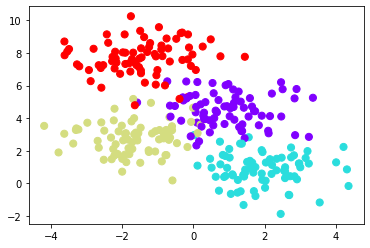

In [38]:
from sklearn.datasets import make_blobs

x_df_vermelho, y_df_vermelho = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(x_df_vermelho[:, 0], x_df_vermelho[:, 1], c=y_df_vermelho, s=50, cmap='rainbow')

In [39]:
# Criando o modelo de árvore de decisão
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(x_df_vermelho, y_df_vermelho)

In [40]:
#Plotar as classes:

def visualize_classifier(model, x_df_vermelho, y_df_vermelho, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(x_df_vermelho[:, 0], x_df_vermelho[:, 1], c=y_df_vermelho, s=30, cmap=cmap,
               clim=(y_df_vermelho.min(), y_df_vermelho.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(x_df_vermelho, y_df_vermelho)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y_df_vermelho))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y_df_vermelho.min(), y_df_vermelho.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

C:\Users\ALDOLIV\AppData\Local\Temp/ipykernel_8876/3454051677.py:22: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


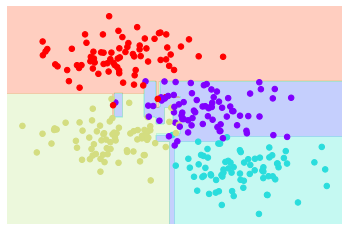

In [41]:
# Visualizando a Randon Forest e sua classificação
visualize_classifier(DecisionTreeClassifier(), x_df_vermelho, y_df_vermelho)

In [42]:
xtrain, xtest, ytrain, ytest = train_test_split(x_df_vermelho, y_df_vermelho, random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
ypred_train = model.predict(xtrain)

In [43]:
# Calculando a acurácia entre treinamento e teste:

print("Acurácia do modelo de Treinamento:", accuracy_score(ytrain, ypred_train))
print("Acurácia do modelo de Teste:", accuracy_score(ytest, ypred))

Acurácia do modelo de Treinamento: 1.0
Acurácia do modelo de Teste: 0.9333333333333333


Text(91.68, 0.5, 'predicted label')

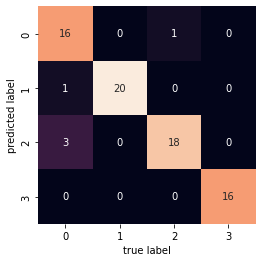

In [44]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')